In [1]:
import pandas as pd
import numpy as np

# Ruta correcta desde Data_clean/ hacia Data_raw/2017
ruta_2017 = "../Data_raw/2017/MICRODAT2017.CA.txt"

# Cargamos el archivo
df2017 = pd.read_csv(ruta_2017, sep="\t", encoding="latin-1", low_memory=False)

df2017.head()


FileNotFoundError: [Errno 2] No such file or directory: '../Data_raw/2017/MICRODAT2017.CA.txt'

In [2]:
ruta_2017 = "/Data_raw/2017/MICRODAT2017.CA.txt"



In [3]:
import pandas as pd

ruta_2017 = "Data_raw/2017/MICRODAT2017.CA.txt"  # <- sin los dos puntos

df2017 = pd.read_csv(ruta_2017, sep="\t", encoding="latin-1", low_memory=False)

df2017.head()



,160000101101208431 11222 33021 561 511131211112 1112 1111111111111111112 1111111111111212 1112 1112 2 2 1111112 1112 121 2 2 222 2 2 1111234111111 11111411243112121212202 10110110110002000001001222122222222222224 2222221222321222112101 00832 12 100122100003000151122222222122 112 11112 112 2 2 1111112 2 2 11112 2 2 2 21111111221114215222222215807311 1043543110243116666 44 109 343545555452 645.439953000000000000000
0,160000102104102611 21122183108 ...
1,160000104102205651 11222 12081 ...
2,160000105101107031 11222 12041 ...
3,160000107101106131 11222 33061 ...
4,160000109101203511 11222 3108 ...


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Especificación de columnas (ENSE 2017 adultos) ---



colspecs_ense2017 = [
    (0, 2),     # CCAA (1-2)
    (12, 13),   # SEXOa (13-13)
    (13, 16),   # EDADa (14-16)
    (398, 401), # S109 Altura en cm (399-401)
    (401, 404), # S110 Peso en kg (402-404)

    # Alimentación - ultraprocesados
    (439, 440), # U120_11 Frecuencia de dulces (440-440)
    (440, 441), # U120_12 Refrescos con azúcar (441-441)
    (441, 442), # U120_13 Comida rápida (442-442)
    (442, 443), # U120_14 Snacks salados (443-443)

    # Variables derivadas útiles
    (578, 579), # IMCa categoría de IMC (579-579)
    (579, 584), # CMD1 consumo medio diario alcohol semanal (580-584)
]

names_ense2017 = [
    "CCAA",
    "sexo",
    "edad",
    "altura_cm",
    "peso_kg",
    "freq_dulces",
    "freq_refrescos",
    "freq_fastfood",
    "freq_snacks",
    "IMC_cat",
    "alcohol_md_sem",
]

# --- 2. Lectura del fichero fijo ---

ruta_txt_2017 = "Data_raw/2017/MICRODAT2017.CA.txt"   # cámbialo por el nombre real

df17 = pd.read_fwf(
    ruta_txt_2017,
    colspecs=colspecs_ense2017,
    names=names_ense2017,
    dtype=str
)

# --- 3. Limpiar tipos numéricos básicos ---

# Altura y peso (poner NaN en 998 / 999)
for col in ["altura_cm", "peso_kg"]:
    df17[col] = df17[col].replace(["998", "999"], np.nan).astype(float)

# IMC derivado (1=insuf., 2=normo, 3=sobrepeso, 4=obesidad)
map_imc = {
    "1": "Peso insuficiente",
    "2": "Normopeso",
    "3": "Sobrepeso",
    "4": "Obesidad"
}
df17["IMC_cat"] = df17["IMC_cat"].map(map_imc)

# Consumo medio diario de alcohol (CMD1: 3 enteros + 2 decimales, 999 = no consta)
df17["alcohol_md_sem"] = (
    df17["alcohol_md_sem"]
    .replace("99999", np.nan)   # por si viene así
    .astype(float) / 100        # pasa de centésimas a valor real
)

# --- 4. Mapear códigos de CCAA a nombres ---

map_ccaa = {
    "01": "Andalucía",
    "02": "Aragón",
    "03": "Asturias, Principado de",
    "04": "Balears, Illes",
    "05": "Canarias",
    "06": "Cantabria",
    "07": "Castilla y León",
    "08": "Castilla - La Mancha",
    "09": "Cataluña",
    "10": "Comunitat Valenciana",
    "11": "Extremadura",
    "12": "Galicia",
    "13": "Madrid, Comunidad de",
    "14": "Murcia, Región de",
    "15": "Navarra, Comunidad Foral de",
    "16": "País Vasco",
    "17": "Rioja, La",
    "18": "Ceuta",
    "19": "Melilla",
}

df17["CCAA_nombre"] = df17["CCAA"].map(map_ccaa)

df17.head()


,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,CCAA_nombre
0,16,2,084,158.0,73.0,1,6,6,6,Sobrepeso,0.00,País Vasco
1,16,1,026,182.0,65.0,3,1,1,4,Normopeso,0.00,País Vasco
2,16,2,056,160.0,50.0,1,6,6,4,Normopeso,0.00,País Vasco
3,16,1,070,164.0,64.0,1,5,5,4,Normopeso,44.29,País Vasco
4,16,1,061,167.0,80.0,5,5,5,5,Sobrepeso,45.71,País Vasco


In [ ]:
import numpy as np

map_freq_sem = {
    '1': 7,    # Diario
    '2': 5,    # 4–6 veces/semana
    '3': 3,
    '4': 1.5,
    '5': 0.5,
    '6': 0,    # Nunca
    # 8, 9 = No sabe / No contesta -> se quedarán como NaN
}

for col in ["freq_dulces", "freq_refrescos", "freq_fastfood", "freq_snacks"]:
    df17[col + "_sem"] = df17[col].map(map_freq_sem)



In [ ]:
df17

,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,CCAA_nombre,freq_dulces_sem,freq_refrescos_sem,freq_fastfood_sem,freq_snacks_sem
0,16,2,084,158.0,73.0,1,6,6,6,Sobrepeso,0.00,País Vasco,7.0,0.0,0.0,0.0
1,16,1,026,182.0,65.0,3,1,1,4,Normopeso,0.00,País Vasco,3.0,7.0,7.0,1.5
2,16,2,056,160.0,50.0,1,6,6,4,Normopeso,0.00,País Vasco,7.0,0.0,0.0,1.5
3,16,1,070,164.0,64.0,1,5,5,4,Normopeso,44.29,País Vasco,7.0,0.5,0.5,1.5
4,16,1,061,167.0,80.0,5,5,5,5,Sobrepeso,45.71,País Vasco,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,19,2,059,167.0,56.0,6,6,5,6,Normopeso,1.43,Melilla,0.0,0.0,0.5,0.0
23085,19,1,056,169.0,78.0,5,5,5,5,Sobrepeso,10.00,Melilla,0.5,0.5,0.5,0.5
23086,19,1,031,181.0,79.0,1,6,4,4,Normopeso,8.57,Melilla,7.0,0.0,1.5,1.5
23087,19,2,052,165.0,54.0,9,9,9,9,Normopeso,0.00,Melilla,NaN,NaN,NaN,NaN


In [ ]:
df17["ICU"] = (
    df17["freq_dulces_sem"] +
    df17["freq_refrescos_sem"] +
    df17["freq_fastfood_sem"] +
    df17["freq_snacks_sem"]
)


In [ ]:
def clasificar_icu(valor):
    if valor < 5:
        return "Bajo"
    elif valor < 12:
        return "Moderado"
    else:
        return "Alto"

df17["ICU_categoria"] = df17["ICU"].apply(clasificar_icu)


In [ ]:
import numpy as np
import pandas as pd

def calcular_icu(df):
    # Aseguramos que las 4 frecuencias son numéricas
    for col in ["freq_dulces", "freq_refrescos", "freq_fastfood", "freq_snacks"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        # Quitamos códigos 8/9 (NS/NC, etc.)
        df.loc[df[col].isin([8, 9]), col] = np.nan

    # Mapa de categorías → veces por semana
    map_freq_sem = {
        1: 7,     # Diario
        2: 5,     # 4–6 veces/semana
        3: 3,     # 2–3 veces/semana
        4: 1.5,   # 1 vez/semana
        5: 0.5,   # 1–3/mes
        6: 0,     # Nunca
    }

    for col in ["freq_dulces", "freq_refrescos", "freq_fastfood", "freq_snacks"]:
        df[col + "_sem"] = df[col].map(map_freq_sem)

    # Índice de consumo de ultraprocesados
    df["ICU"] = (
        df["freq_dulces_sem"] +
        df["freq_refrescos_sem"] +
        df["freq_fastfood_sem"] +
        df["freq_snacks_sem"]
    )

    # Misma clasificación para TODOS los años (la de 2020)
    df["ICU_categoria"] = pd.cut(
        df["ICU"],
        bins=[-0.1, 3, 7, 100],
        labels=["Bajo", "Moderado", "Alto"]
    )

    return df


In [ ]:
df17 = calcular_icu(df17)
df17["año"] = 2017
df17.head()


,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,CCAA_nombre,freq_dulces_sem,freq_refrescos_sem,freq_fastfood_sem,freq_snacks_sem,ICU,ICU_categoria,año
0,16,2,084,158.0,73.0,1.0,6.0,6.0,6.0,Sobrepeso,0.00,País Vasco,7.0,0.0,0.0,0.0,7.0,Moderado,2017
1,16,1,026,182.0,65.0,3.0,1.0,1.0,4.0,Normopeso,0.00,País Vasco,3.0,7.0,7.0,1.5,18.5,Alto,2017
2,16,2,056,160.0,50.0,1.0,6.0,6.0,4.0,Normopeso,0.00,País Vasco,7.0,0.0,0.0,1.5,8.5,Alto,2017
3,16,1,070,164.0,64.0,1.0,5.0,5.0,4.0,Normopeso,44.29,País Vasco,7.0,0.5,0.5,1.5,9.5,Alto,2017
4,16,1,061,167.0,80.0,5.0,5.0,5.0,5.0,Sobrepeso,45.71,País Vasco,0.5,0.5,0.5,0.5,2.0,Bajo,2017


In [ ]:
df17[["ICU", "ICU_categoria"]].head()


,ICU,ICU_categoria
0,7.0,Moderado
1,18.5,Alto
2,8.5,Alto
3,9.5,Alto
4,2.0,Bajo


In [ ]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23089 entries, 0 to 23088
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CCAA                23089 non-null  object  
 1   sexo                23089 non-null  object  
 2   edad                23089 non-null  object  
 3   altura_cm           22491 non-null  float64 
 4   peso_kg             22348 non-null  float64 
 5   freq_dulces         23063 non-null  float64 
 6   freq_refrescos      23056 non-null  float64 
 7   freq_fastfood       23056 non-null  float64 
 8   freq_snacks         23055 non-null  float64 
 9   IMC_cat             22019 non-null  object  
 10  alcohol_md_sem      23089 non-null  float64 
 11  CCAA_nombre         23089 non-null  object  
 12  freq_dulces_sem     23063 non-null  float64 
 13  freq_refrescos_sem  23056 non-null  float64 
 14  freq_fastfood_sem   23056 non-null  float64 
 15  freq_snacks_sem     23055 non-null  

In [ ]:
df17["CCAA"] = df17["CCAA"].astype(str).str.zfill(2).map(map_ccaa)


In [ ]:
df17.drop(columns=["CCAA_nombre"], inplace=True)


In [ ]:
df17

,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,freq_dulces_sem,freq_refrescos_sem,freq_fastfood_sem,freq_snacks_sem,ICU,ICU_categoria,año
0,País Vasco,2,084,158.0,73.0,1.0,6.0,6.0,6.0,Sobrepeso,0.00,7.0,0.0,0.0,0.0,7.0,Moderado,2017
1,País Vasco,1,026,182.0,65.0,3.0,1.0,1.0,4.0,Normopeso,0.00,3.0,7.0,7.0,1.5,18.5,Alto,2017
2,País Vasco,2,056,160.0,50.0,1.0,6.0,6.0,4.0,Normopeso,0.00,7.0,0.0,0.0,1.5,8.5,Alto,2017
3,País Vasco,1,070,164.0,64.0,1.0,5.0,5.0,4.0,Normopeso,44.29,7.0,0.5,0.5,1.5,9.5,Alto,2017
4,País Vasco,1,061,167.0,80.0,5.0,5.0,5.0,5.0,Sobrepeso,45.71,0.5,0.5,0.5,0.5,2.0,Bajo,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,Melilla,2,059,167.0,56.0,6.0,6.0,5.0,6.0,Normopeso,1.43,0.0,0.0,0.5,0.0,0.5,Bajo,2017
23085,Melilla,1,056,169.0,78.0,5.0,5.0,5.0,5.0,Sobrepeso,10.00,0.5,0.5,0.5,0.5,2.0,Bajo,2017
23086,Melilla,1,031,181.0,79.0,1.0,6.0,4.0,4.0,Normopeso,8.57,7.0,0.0,1.5,1.5,10.0,Alto,2017
23087,Melilla,2,052,165.0,54.0,NaN,NaN,NaN,NaN,Normopeso,0.00,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [ ]:
import numpy as np

# edad de string tipo "026" a número
df17["edad"] = df17["edad"].astype(int)

# mapear sexo (ENSA/ENSE: 1=Hombre, 2=Mujer)
map_sexo = {"1": "Hombre", "2": "Mujer"}
df17["sexo"] = df17["sexo"].map(map_sexo)



df17.head()


,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,freq_dulces_sem,freq_refrescos_sem,freq_fastfood_sem,freq_snacks_sem,ICU,ICU_categoria,año
0,País Vasco,Mujer,84,158.0,73.0,1.0,6.0,6.0,6.0,Sobrepeso,0.00,7.0,0.0,0.0,0.0,7.0,Moderado,2017
1,País Vasco,Hombre,26,182.0,65.0,3.0,1.0,1.0,4.0,Normopeso,0.00,3.0,7.0,7.0,1.5,18.5,Alto,2017
2,País Vasco,Mujer,56,160.0,50.0,1.0,6.0,6.0,4.0,Normopeso,0.00,7.0,0.0,0.0,1.5,8.5,Alto,2017
3,País Vasco,Hombre,70,164.0,64.0,1.0,5.0,5.0,4.0,Normopeso,44.29,7.0,0.5,0.5,1.5,9.5,Alto,2017
4,País Vasco,Hombre,61,167.0,80.0,5.0,5.0,5.0,5.0,Sobrepeso,45.71,0.5,0.5,0.5,0.5,2.0,Bajo,2017


Consumo medio de ultraprocesados por comunidad autonoma


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupamos por comunidad y sacamos la media del índice ICU
consumo_ccaa = (
    df17.groupby("CCAA", as_index=False)["ICU"]
        .mean()
        .sort_values("ICU", ascending=False)
).round(2)

consumo_ccaa



,CCAA,ICU
9,Ceuta,7.62
1,Aragón,7.38
7,Castilla y León,7.17
17,País Vasco,6.97
18,"Rioja, La",6.82
11,Extremadura,6.71
13,"Madrid, Comunidad de",6.55
0,Andalucía,6.48
3,"Balears, Illes",6.31
6,Castilla - La Mancha,6.14


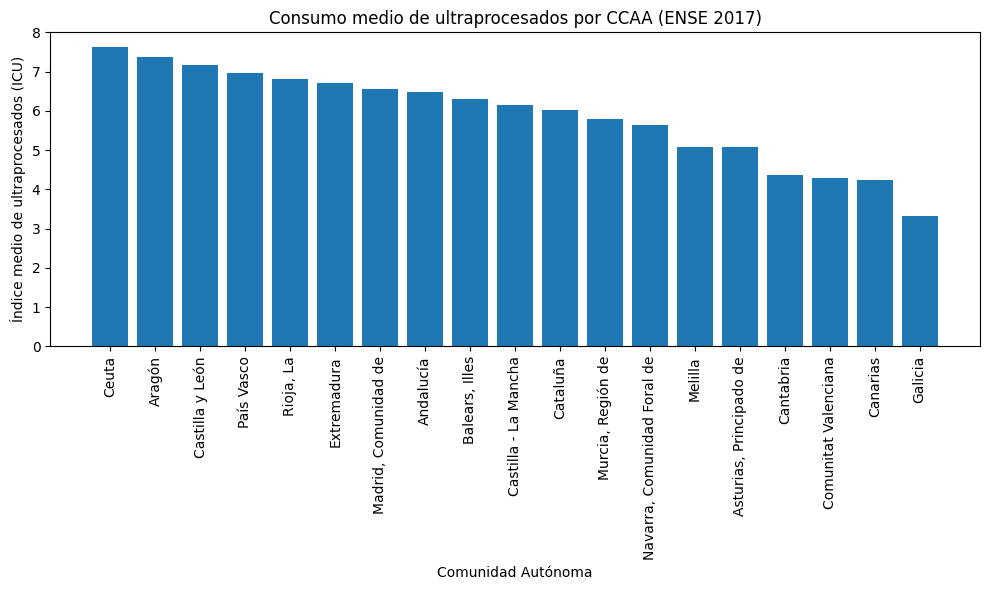

In [ ]:
plt.figure(figsize=(10, 6))             # tamaño del gráfico

plt.bar(consumo_ccaa["CCAA"], consumo_ccaa["ICU"])

plt.xticks(rotation=90)                 # girar nombres de CCAA
plt.ylabel("Índice medio de ultraprocesados (ICU)")
plt.xlabel("Comunidad Autónoma")
plt.title("Consumo medio de ultraprocesados por CCAA (ENSE 2017)")

plt.tight_layout()
plt.show()


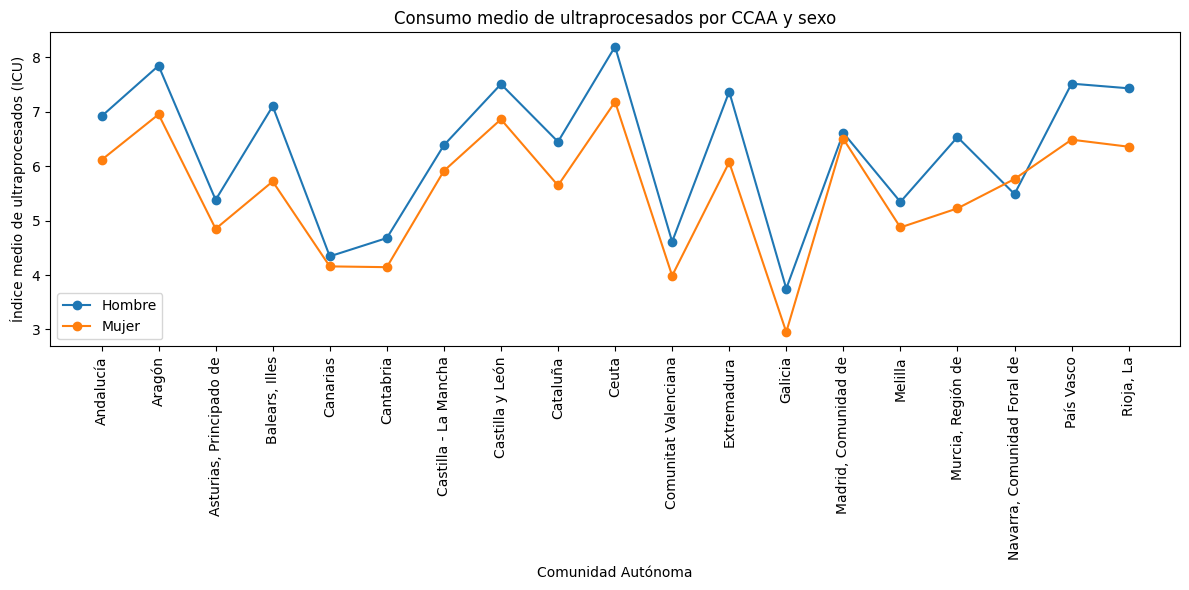

In [ ]:
consumo_ccaa_sexo = (
    df17.groupby(["CCAA", "sexo"])["ICU"]
        .mean()
        .reset_index()
)

plt.figure(figsize=(12, 6))

for sexo in ["Hombre", "Mujer"]:
    datos = consumo_ccaa_sexo[consumo_ccaa_sexo["sexo"] == sexo]
    plt.plot(datos["CCAA"], datos["ICU"], marker="o", label=sexo)

plt.xticks(rotation=90)
plt.ylabel("Índice medio de ultraprocesados (ICU)")
plt.xlabel("Comunidad Autónoma")
plt.title("Consumo medio de ultraprocesados por CCAA y sexo")
plt.legend()
plt.tight_layout()
plt.show()


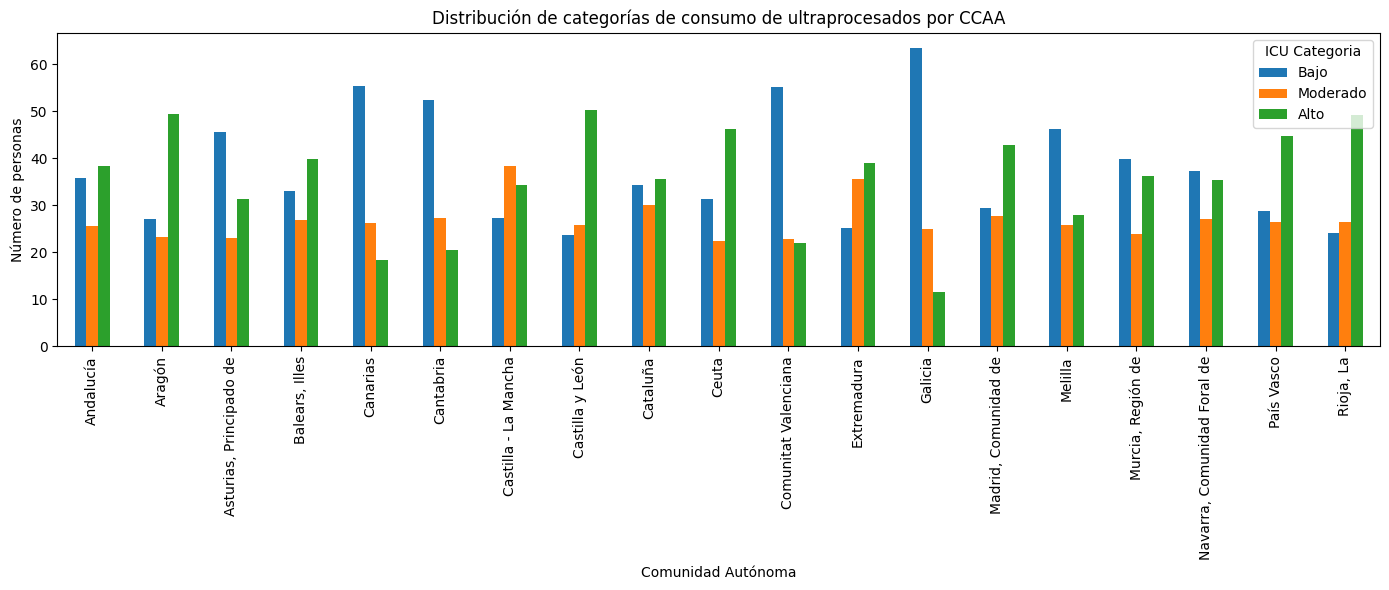

In [ ]:
import matplotlib.pyplot as plt

colors = {
    "Bajo": "#1f77b4",      
    "Moderado": "#ff7f0e",  
    "Alto": "#2ca02c"       
}

# Tabla de frecuencias
tabla = pd.crosstab(df17["CCAA"], df17["ICU_categoria"], normalize="index")*100

# Gráfico apilado
tabla.plot(kind="bar", stacked=False, figsize=(14,6),color=[colors[col] for col in tabla.columns])

plt.title("Distribución de categorías de consumo de ultraprocesados por CCAA")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Número de personas")
plt.xticks(rotation=90)
plt.legend(title="ICU Categoria")

plt.tight_layout()
plt.show()


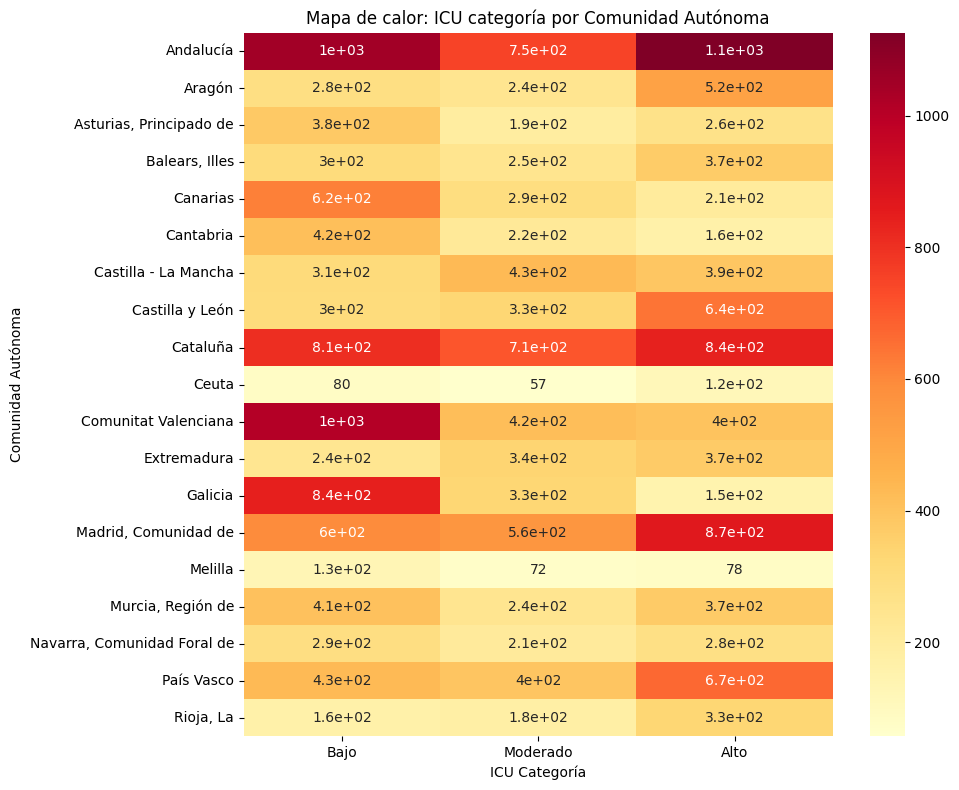

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))

tabla = pd.crosstab(df17["CCAA"], df17["ICU_categoria"])

sns.heatmap(tabla, annot=True, cmap="YlOrRd")

plt.title("Mapa de calor: ICU categoría por Comunidad Autónoma")
plt.xlabel("ICU Categoría")
plt.ylabel("Comunidad Autónoma")
plt.tight_layout()
plt.show()


In [ ]:
obesidad_por_ccaa = df17[df17["IMC_cat"] == "Obesidad"] \
                        .groupby("CCAA")["IMC_cat"] \
                        .count() \
                        .sort_values(ascending=False)

obesidad_por_ccaa


CCAA
Andalucía                      581
Cataluña                       357
Comunitat Valenciana           354
Madrid, Comunidad de           307
Galicia                        245
Castilla - La Mancha           226
País Vasco                     220
Canarias                       203
Murcia, Región de              176
Asturias, Principado de        173
Extremadura                    168
Castilla y León                164
Aragón                         160
Balears, Illes                 136
Navarra, Comunidad Foral de    120
Cantabria                      106
Rioja, La                      102
Ceuta                           58
Melilla                         54
Name: IMC_cat, dtype: int64

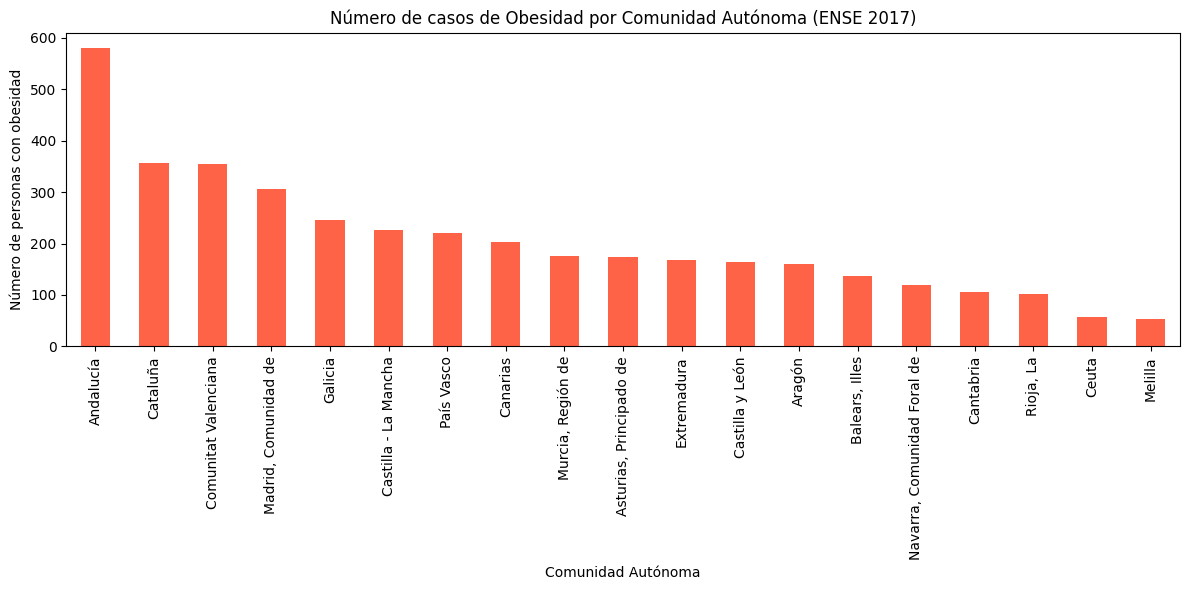

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
obesidad_por_ccaa.plot(kind="bar", color="tomato")

plt.title("Número de casos de Obesidad por Comunidad Autónoma (ENSE 2017)")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Número de personas con obesidad")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
total_por_ccaa = df17.groupby("CCAA")["IMC_cat"].count()

porcentaje_obesidad = (obesidad_por_ccaa / total_por_ccaa * 100).round(2)

porcentaje_obesidad


CCAA
Andalucía                      20.63
Aragón                         15.97
Asturias, Principado de        21.60
Balears, Illes                 15.87
Canarias                       19.58
Cantabria                      17.49
Castilla - La Mancha           22.22
Castilla y León                13.28
Cataluña                       15.75
Ceuta                          23.39
Comunitat Valenciana           19.44
Extremadura                    18.50
Galicia                        19.05
Madrid, Comunidad de           15.52
Melilla                        19.57
Murcia, Región de              17.50
Navarra, Comunidad Foral de    16.35
País Vasco                     14.85
Rioja, La                      15.84
Name: IMC_cat, dtype: float64

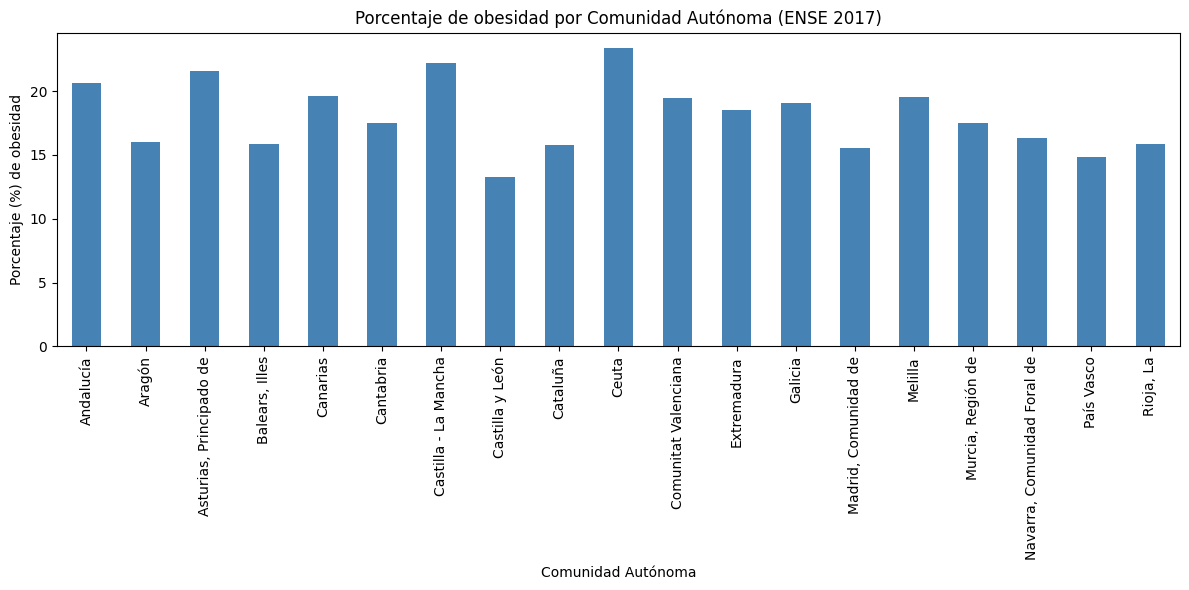

In [ ]:
plt.figure(figsize=(12,6))
porcentaje_obesidad.plot(kind="bar", color="steelblue")

plt.title("Porcentaje de obesidad por Comunidad Autónoma (ENSE 2017)")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Porcentaje (%) de obesidad")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
# dentro de 02_ENSE_2017.ipynb
df17.to_csv("Data_clean/ENSE_2017_clean.csv", index=False, encoding="utf-8")


In [ ]:
df17

,CCAA,sexo,edad,altura_cm,peso_kg,freq_dulces,freq_refrescos,freq_fastfood,freq_snacks,IMC_cat,alcohol_md_sem,freq_dulces_sem,freq_refrescos_sem,freq_fastfood_sem,freq_snacks_sem,ICU,ICU_categoria,año
0,País Vasco,Mujer,84,158.0,73.0,1.0,6.0,6.0,6.0,Sobrepeso,0.00,7.0,0.0,0.0,0.0,7.0,Moderado,2017
1,País Vasco,Hombre,26,182.0,65.0,3.0,1.0,1.0,4.0,Normopeso,0.00,3.0,7.0,7.0,1.5,18.5,Alto,2017
2,País Vasco,Mujer,56,160.0,50.0,1.0,6.0,6.0,4.0,Normopeso,0.00,7.0,0.0,0.0,1.5,8.5,Alto,2017
3,País Vasco,Hombre,70,164.0,64.0,1.0,5.0,5.0,4.0,Normopeso,44.29,7.0,0.5,0.5,1.5,9.5,Alto,2017
4,País Vasco,Hombre,61,167.0,80.0,5.0,5.0,5.0,5.0,Sobrepeso,45.71,0.5,0.5,0.5,0.5,2.0,Bajo,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23084,Melilla,Mujer,59,167.0,56.0,6.0,6.0,5.0,6.0,Normopeso,1.43,0.0,0.0,0.5,0.0,0.5,Bajo,2017
23085,Melilla,Hombre,56,169.0,78.0,5.0,5.0,5.0,5.0,Sobrepeso,10.00,0.5,0.5,0.5,0.5,2.0,Bajo,2017
23086,Melilla,Hombre,31,181.0,79.0,1.0,6.0,4.0,4.0,Normopeso,8.57,7.0,0.0,1.5,1.5,10.0,Alto,2017
23087,Melilla,Mujer,52,165.0,54.0,NaN,NaN,NaN,NaN,Normopeso,0.00,NaN,NaN,NaN,NaN,NaN,NaN,2017
